In [1]:
import os

from collections import OrderedDict

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

import warnings

from Standard_functions import plot_features, get_user_split_data, plot_fit_score_pred

warnings.filterwarnings('always') 
np.seterr(divide='ignore', invalid='ignore')
%matplotlib inline

In [2]:
os.chdir('../Data/')

In [3]:
os.listdir()

['products.csv',
 'orders.csv',
 '.DS_Store',
 '00_merged_prod_order',
 'order_products__train.csv',
 'departments.csv',
 'aisles.csv',
 'order_products__prior.csv',
 'sample_submission.csv']

## Loading our Datasets

In [4]:
df = pd.read_pickle('00_merged_prod_order')

In [5]:
ord_prod_train_df = pd.read_csv('order_products__prior.csv')

In [6]:
ord_prod_test_df = pd.read_csv('order_products__train.csv')

In [7]:
ord_df = pd.read_csv('orders.csv')

In [8]:
ord_prod_train_df = ord_prod_train_df.merge(ord_df, on='order_id')
ord_prod_test_df = ord_prod_test_df.merge(ord_df, on='order_id')

## Feature Engineering

Our feature engineering began in the 'Organizing data section.  
We will visualize that first feature below and begin creating new features.

<Figure size 648x648 with 0 Axes>

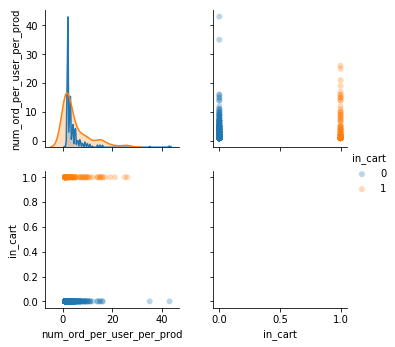

Our score is 0.0864409013045197
The coefficients are: 
                     Features  Coefficients
0  num_ord_per_user_per_prod        0.1422
And we've predicted 1675585 non-re-orders and 16723 re-orders.


In [9]:
X_tr, X_val, y_tr, y_val = get_user_split_data(df)
plot_fit_score_pred(df, X_tr, X_val, y_tr, y_val)

As you can see, we're setting the bar pretty low.

## User-Product features

In [11]:
user_prod_features = ['user_product_avg_add_to_cart_order']

df_user_prod_features = (ord_prod_train_df.groupby(
                        ['product_id','user_id'],as_index=False) \
                        .agg(OrderedDict(
                        [('add_to_cart_order','mean')])))

df_user_prod_features.columns = ['product_id','user_id'] + user_prod_features 
df = df.merge(df_user_prod_features,on=['user_id','product_id'])
df['user_product_order_freq'] = df['num_ord_per_user_per_prod'] / df['user_total_orders'] 

KeyError: 'user_total_orders'

In [ ]:
X_tr, X_val, y_tr, y_val = get_user_split_data(df)
plot_fit_score_pred(df, X_tr, X_val, y_tr, y_val)